# Exploratory Data Analysis (EDA)

Notebook ini berisi analisis awal terhadap **Cybersecurity Attack Dataset**.
Struktur analisis:
1. Setup & Import Library
2. Load Dataset
3. Informasi Awal Dataset
4. Exploratory Data Analysis (EDA)
5. Insight & Kesimpulan

## 1. Setup & Import Library




In [ ]:
# 1. Mount Google Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import requirements library

#mengolah dataset
import pandas as pd

#fungsi matematis
import numpy as np

#membuat graph
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Dataset


In [ ]:
data = pd. read_csv("/content/drive/MyDrive/Colab Notebooks/Attack_Dataset.csv")

# Dataset from https://www.kaggle.com/datasets/tannubarot/cybersecurity-attack-and-defence-dataset

## 3. Informasi Awal Dataset

In [ ]:
data.head()

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ...",NaN
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun...",NaN


In [ ]:
# get the shape of the dataset
baris, kolom = data.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 14133
kolom: 16


In [ ]:
# get statistical summary
data.describe()

,ID
count,14133.000000
mean,7067.000000
std,4079.990012
min,1.000000
25%,3534.000000
50%,7067.000000
75%,10600.000000
max,14133.000000




### 3.1 Cek Missing Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    14133 non-null  int64 
 1   Title                 14133 non-null  object
 2   Category              14133 non-null  object
 3   Attack Type           14133 non-null  object
 4   Scenario Description  14133 non-null  object
 5   Tools Used            14119 non-null  object
 6   Attack Steps          14133 non-null  object
 7   Target Type           14129 non-null  object
 8   Vulnerability         14115 non-null  object
 9   MITRE Technique       14109 non-null  object
 10  Impact                14130 non-null  object
 11  Detection Method      14129 non-null  object
 12  Solution              14130 non-null  object
 13  Tags                  14130 non-null  object
 14  Source                13973 non-null  object
 15  Unnamed: 15           46 non-null   

### 3.2 Data Cleaning

In [ ]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_data[missing_data['Missing Count'] > 0])

                  Missing Count  Missing Percentage
Unnamed: 15               14087           99.674521
Source                      160            1.132102
MITRE Technique              24            0.169815
Vulnerability                18            0.127361
Tools Used                   14            0.099059
Target Type                   4            0.028303
Detection Method              4            0.028303
Impact                        3            0.021227
Tags                          3            0.021227
Solution                      3            0.021227


In [ ]:
columns_to_drop = [col for col in data.columns if 'Unnamed' in col or data[col].isnull().sum() > len(data)*0.8]
if columns_to_drop:
    data = data.drop(columns=columns_to_drop)
print(f"Kolom yang di-drop: {columns_to_drop}")


Kolom yang di-drop: ['Unnamed: 15']


In [ ]:
duplicate_count = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")
if duplicate_count > 0:
    data = data.drop_duplicates()
    print("✅ Data duplikat telah dihapus")

Jumlah data duplikat: 0


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna('Unknown')

print("✅ Data cleaning selesai!")
print(f"Dataset final shape: {data.shape}")

✅ Data cleaning selesai!
Dataset final shape: (14133, 15)


In [ ]:
# Cek apakah masih ada missing values
print("🔍 Cek missing values setelah cleaning:")
missing_after = data.isnull().sum()
print(missing_after[missing_after > 0])

print(f"\n📊 Total missing values tersisa: {data.isnull().sum().sum()}")

🔍 Cek missing values setelah cleaning:
Series([], dtype: int64)

📊 Total missing values tersisa: 0


##4.Exploratory Data Analysis (EDA)

Dataset berhasil dimuat!

--- Top 10 Kategori untuk 'Category' ---
Category
Insider Threat                                 569
Physical / Hardware Attacks                    548
Quantum Cryptography & Post-Quantum Threats    542
Wireless Attacks (Advanced)                    535
Malware & Threat                               528
Satellite & Space Infrastructure Security      515
DFIR                                           510
Red Team                                       503
Blockchain / Web3                              503
Blue Team                                      503
Name: count, dtype: int64


/tmp/ipython-input-677829991.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis') # Using viridis colormap


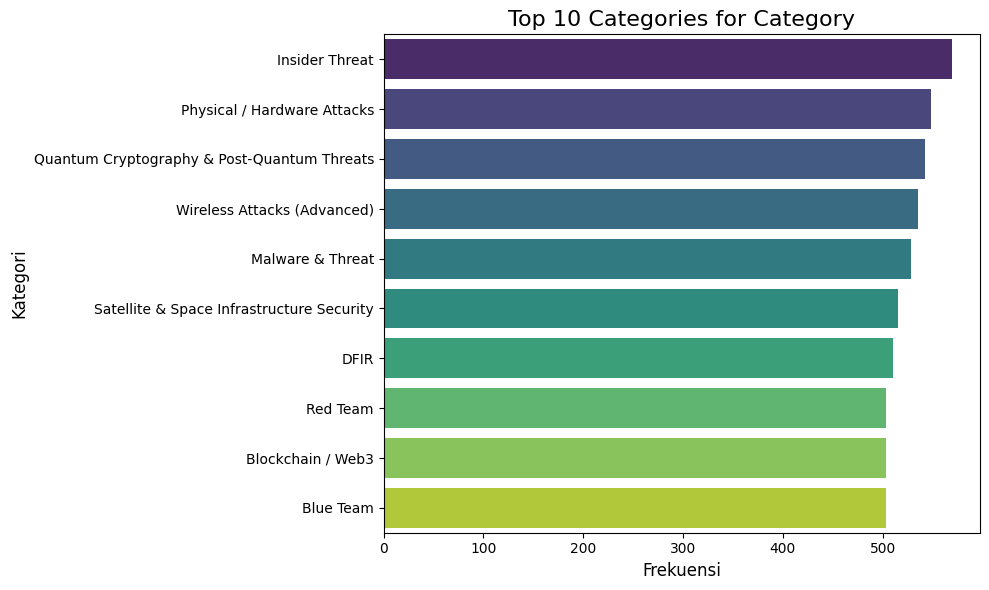

In [ ]:
# Menampilkan 10 kategori terbanyak
file_path = '/content/drive/MyDrive/Colab Notebooks/Attack_Dataset.csv'
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan Anda telah mengunggahnya ke Google Colab.")

categorical_cols = ['Category']

for col in categorical_cols:

    top_10 = data[col].value_counts().nlargest(10)


    print(f"\n--- Top 10 Kategori untuk '{col}' ---")
    print(top_10)


    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
    plt.title(f'Top 10 Categories for {col}', fontsize=16)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel('Kategori', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:

print("🎯 ANALISIS ATTACK TYPE:")
attack_type_counts = data['Attack Type'].value_counts().head(10)
print("Top 10 Attack Types:")
print(attack_type_counts)

🎯 ANALISIS ATTACK TYPE:
Top 10 Attack Types:
Attack Type
Hardware Interface Exploitation    161
Wireless Attacks (Advanced)         95
Dependency Confusion                91
Fuzzer Configuration                75
Malicious Libraries                 74
Malicious Library                   71
Privilege Escalation                61
Removable Media Attack              55
Misuse of Legitimate Tools          55
Data Exfiltration                   52
Name: count, dtype: int64


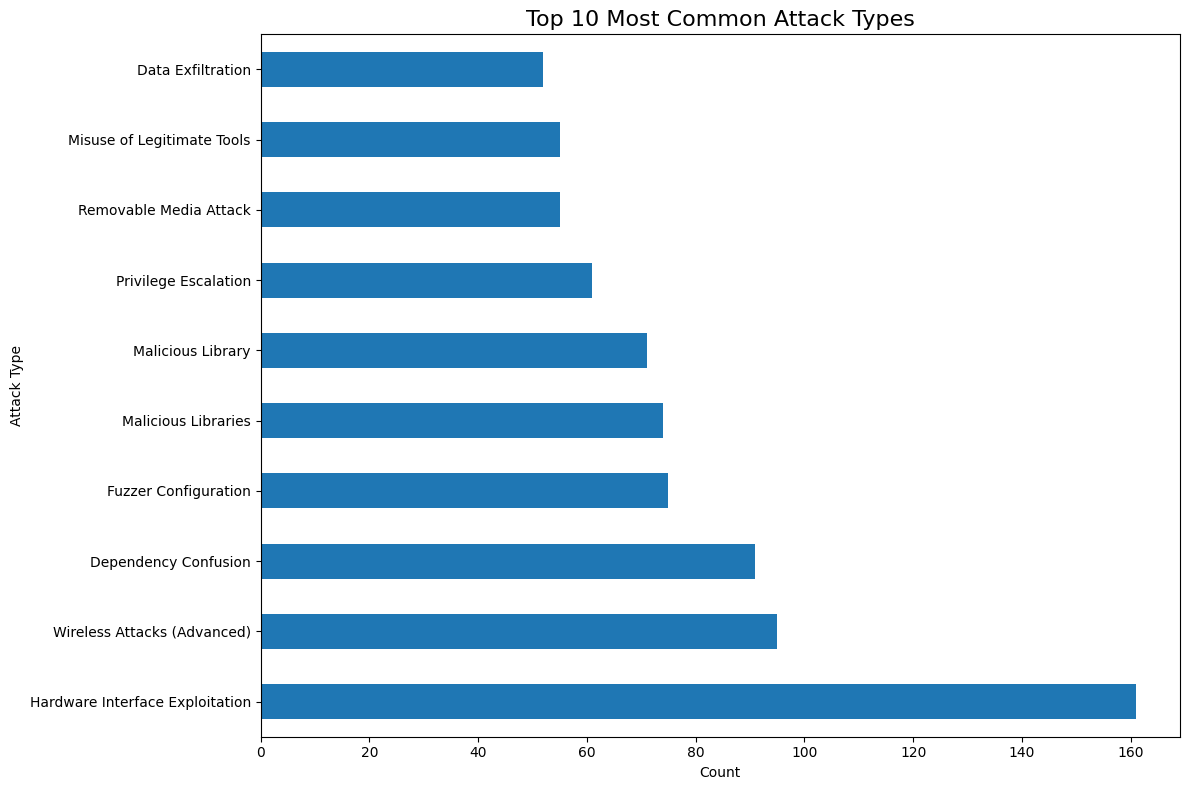

In [ ]:
# Ambil 10 attack types paling banyak
top_attacks = data['Attack Type'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_attacks.plot(kind='barh')  # Horizontal bar lebih bagus
plt.title('Top 10 Most Common Attack Types', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

In [ ]:
print("ANALISIS TARGET TYPE:")
target_type_counts = data['Target Type'].value_counts()
print("Distribusi Target Type:")
print(target_type_counts)


ANALISIS TARGET TYPE:
Distribusi Target Type:
Target Type
Windows                             291
Workstation                         109
Satellite                            78
Endpoint                             50
Android App                          46
                                   ... 
Cybersecurity Agents with LLM         1
Identity Management Agents            1
Document Generators, UI Mocks         1
Email/Message Generation Systems      1
Agents with Memory Systems            1
Name: count, Length: 9886, dtype: int64


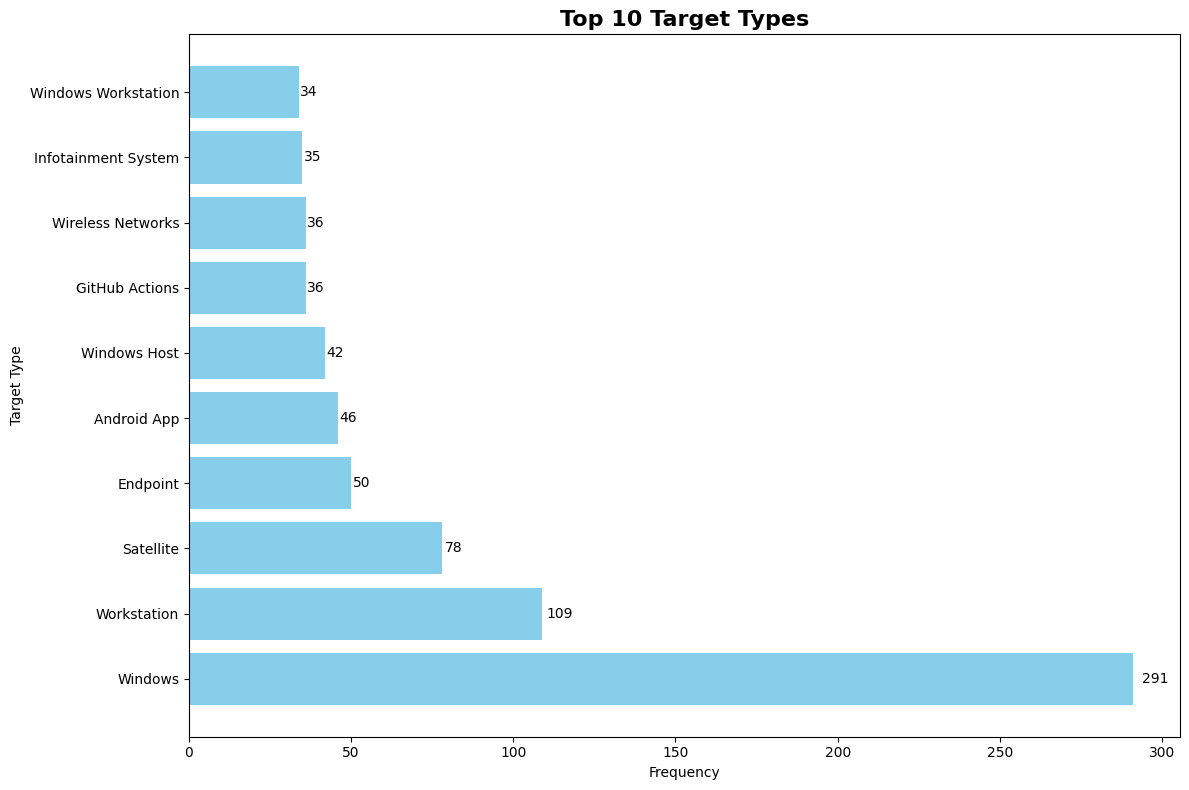

In [ ]:
target_counts = data['Target Type'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(target_counts.index, target_counts.values, color='skyblue')
plt.title('Top 10 Target Types', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Target Type')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

### Distribusi Tipe Target Teratas

Grafik batang horizontal ini menunjukkan 10 jenis target yang paling sering diserang berdasarkan data. Ini membantu mengidentifikasi sistem atau platform yang paling rentan.

In [ ]:
print("ANALISIS TOOLS USED:")
# Karena tools bisa berupa list, kita split dan hitung
all_tools = []
for tools in data['Tools Used'].dropna():
    if pd.notna(tools):
        tools_list = str(tools).split(',')
        all_tools.extend([tool.strip() for tool in tools_list])

tools_series = pd.Series(all_tools)
top_tools = tools_series.value_counts().head(10)
print("Top 10 Tools:")
print(top_tools)

ANALISIS TOOLS USED:
Top 10 Tools:
Burp Suite    1117
Wireshark      711
Python         507
curl           486
Postman        289
PowerShell     265
bash           251
Scapy          234
Browser        196
PyTorch        190
Name: count, dtype: int64


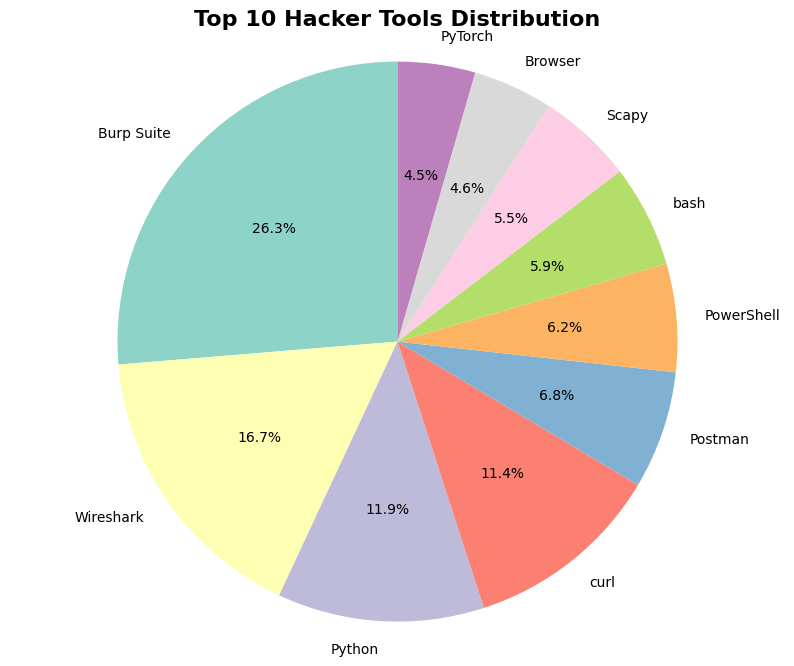

In [ ]:
all_tools = []
for tools in data['Tools Used']:
    if isinstance(tools, str) and tools != 'Unknown':
        tool_list = [tool.strip() for tool in tools.split(',')]
        all_tools.extend(tool_list)

# Count tools
tools_series = pd.Series(all_tools)
top_tools = tools_series.value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(top_tools)))
plt.pie(top_tools.values, labels=top_tools.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Top 10 Hacker Tools Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## 4.1. Korelasi antar Variabel



📊 ANALISIS DISTRIBUSI: Category vs Attack Type (Stacked Bar Chart)


<Figure size 1500x900 with 0 Axes>

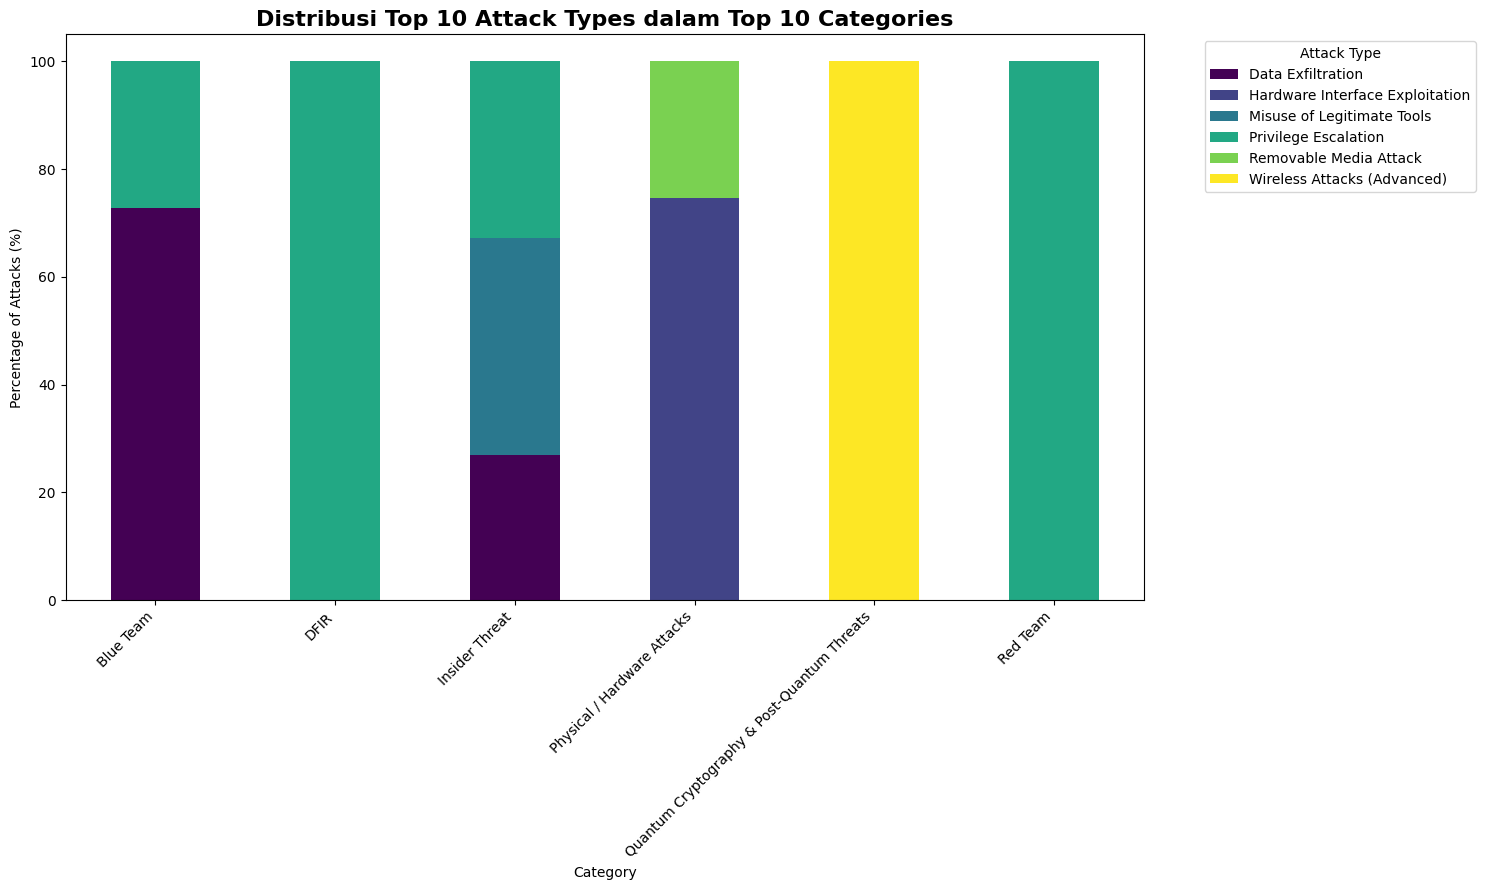


Interpretasi:
Setiap bar menunjukkan sebuah kategori. Segmen warna di dalam bar menunjukkan proporsi (persentase) dari jenis serangan yang berbeda dalam kategori tersebut.
Jika ada bar yang hanya memiliki satu warna, berarti kategori tersebut didominasi oleh satu jenis serangan.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi 'data' dataframe sudah dimuat dan dibersihkan
# (pastikan Anda sudah menjalankan semua sel data cleaning sebelumnya)

print("\n ANALISIS DISTRIBUSI: Category vs Attack Type (Stacked Bar Chart)")
print("="*60)

# Ambil top N kategori dan top M jenis serangan untuk visualisasi yang lebih jelas
# Anda bisa menyesuaikan angka ini. Jika masih terlalu banyak, kurangi.
num_top_categories = 10
num_top_attacks = 10

top_categories = data['Category'].value_counts().head(num_top_categories).index.tolist()
top_attacks = data['Attack Type'].value_counts().head(num_top_attacks).index.tolist()

# Filter data untuk hanya menyertakan top kategori dan attack types
# Ini penting agar chart tidak terlalu padat
filtered_data_ca = data[data['Category'].isin(top_categories) &
                      data['Attack Type'].isin(top_attacks)].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning

if filtered_data_ca.empty:
    print("Tidak ada kombinasi Category dan Attack Type yang tumpang tindih dalam pilihan teratas.")
    print("Coba tingkatkan jumlah 'num_top_categories' atau 'num_top_attacks'.")
else:
    # Buat crosstab untuk frekuensi
    crosstab_freq = pd.crosstab(filtered_data_ca['Category'], filtered_data_ca['Attack Type'])

    # Normalisasi crosstab untuk mendapatkan proporsi (persentase) dalam setiap kategori
    # Ini akan menunjukkan "untuk setiap kategori, berapa persen dari serangan adalah jenis X?"
    crosstab_prop = crosstab_freq.div(crosstab_freq.sum(axis=1), axis=0) * 100

    # Visualisasi Stacked Bar Chart
    plt.figure(figsize=(15, 9))
    crosstab_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 9))
    plt.title(f'Distribusi Top {num_top_attacks} Attack Types dalam Top {num_top_categories} Categories', fontsize=16, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Percentage of Attacks (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print("\nInterpretasi:")
    print("Setiap bar menunjukkan sebuah kategori. Segmen warna di dalam bar menunjukkan proporsi (persentase) dari jenis serangan yang berbeda dalam kategori tersebut.")
    print("Jika ada bar yang hanya memiliki satu warna, berarti kategori tersebut didominasi oleh satu jenis serangan.")



###5. Insight & Kesimpulan


##  Gambaran Umum Dataset
- **Total serangan yang dianalisis**: 14,133 kasus
- **Kelengkapan data**: Sangat baik (>99% lengkap setelah cleaning)
- **Periode data**: Dataset komprehensif covering berbagai jenis cyber attack

##  TEMUAN KRITIS

### 1. **INSIDER THREAT MENDOMINASI**
- **569 kasus (4.03%)** - Kategori serangan terbanyak
- **Masalah**: Ancaman dari dalam organisasi adalah yang paling berbahaya
- **Dampak**: Sulit dideteksi karena pelaku memiliki akses legitimate

### 2. **HARDWARE-LEVEL ATTACKS MENGKHAWATIRKAN**
- **161 kasus Hardware Interface Exploitation**
- **Masalah**: Serangan di level hardware sangat sulit dideteksi
- **Dampak**: Bisa bypass semua security software tradisional

### 3. **WINDOWS TETAP TARGET UTAMA**
- **291 serangan** khusus targeting Windows systems
- **Masalah**: Masih banyak vulnerability di ekosistem Windows
- **Dampak**: Mayoritas enterprise menggunakan Windows

##  POLA SERANGAN YANG MENGKHAWATIRKAN

### Supply Chain Attacks Meningkat
- **Dependency Confusion**: 91 kasus
- **Malicious Libraries**: 74 kasus  
- **Dampak**: Satu library berbahaya bisa menginfeksi ribuan aplikasi

### Advanced Wireless Attacks
- **95 kasus** serangan wireless canggih
- **Tren**: Semakin banyak device nirkabel = semakin banyak attack surface

### Tools Hacking Semakin Mudah Diakses
- **Burp Suite**: 1,117 penggunaan (tool paling populer)
- **Wireshark**: 711 penggunaan
- **Python**: 507 penggunaan
- **Masalah**: Demokratisasi tools membuat siapa saja bisa jadi hacker

##  EMERGING THREATS (Ancaman Masa Depan)

### Quantum Cryptography Threats
- **542 kasus** - Sudah masuk top 3 kategori!
- **Implikasi**: Encryption saat ini akan usang di era quantum computing

### AI/LLM Exploits
- Kategori baru yang muncul
- **Risiko**: AI bisa digunakan untuk otomasi serangan

### Satellite & Space Infrastructure
- **515 kasus** serangan ke infrastruktur satelit
- **Implikasi**: Dari cyber crime ke cyber warfare

##  ANALISIS TREN

### Shift dari Network ke Hardware
- Tradisional: Focus pada network security
- **Sekarang**: Hardware dan firmware jadi target utama

### From External to Internal Threats  
- Dulu: Focus pada hacker dari luar
- **Sekarang**: Insider threat jadi ancaman #1

### Sophistication Increase
- **Advanced tools** seperti Burp Suite dominan
- **Script-based attacks** menggunakan Python meningkat


##  KESIMPULAN UTAMA

**Dataset ini mengungkap evolusi cyber threats yang mengkhawatirkan:**

1. **Insider threat** sudah menjadi ancaman #1 - organisasi harus waspada pada karyawan sendiri
2. **Hardware-level attacks** semakin dominan - security tradisional tidak cukup  
3. **Supply chain** menjadi target utama - satu komponen berbahaya bisa merusak seluruh sistem
4. **Emerging technologies** (AI, Quantum, 5G) membawa ancaman baru

**Organisasi yang tidak segera beradaptasi dengan landscape ancaman ini akan menjadi korban cyber attacks yang semakin sophisticated dan destruktif.**

---
*Analisis berdasarkan 14,133 cyber attack records - September 2024